Функция callable()

Функция callable() принимает в качестве аргумента некоторый объект и возвращает True, если переданный объект является вызываемым, или False в противном случае.

In [2]:
print(callable(int))
print(callable(list))
print(callable(100))
print(callable([1, 2, 3]))

True
True
False
False


Функция hasattr()

Функция hasattr() используется для проверки существования атрибута. Она принимает два аргумента:

object — объект, в котором нужно проверить существование атрибута
name — имя проверяемого атрибута
Функция возвращает True, если object имеет атрибут name, или False в противном случае. 

In [3]:
print(hasattr('stepik', 'isalpha'))
print(hasattr([1, 2, 3], 'sort'))
print(hasattr(13, 'to_str'))

True
True
False


In [8]:
[1, 2, 3].sort

<function list.sort(*, key=None, reverse=False)>

Функция hash()

Функция hash() принимает в качестве аргумента некоторый объект и возвращает целое число, представляющее хеш-значение переданного объекта. Большинство неизменяемых встроенных объектов Python являются хешируемыми и имеют хеш-значение. Изменяемые коллекции, такие как списки, множества и словари, не имеют хеш-значений.

In [9]:
print(hash(899))
print(hash(69.0))
print(hash('timyrik'))
print(hash((1, 2, 3)))
print(hash(False))
print(hash(True))

899
69
4577087807938559375
529344067295497451
0
1


Обратите внимание на то, что хеш-значения целых чисел совпадают с самим числом, за исключением числа −1.

In [10]:
for i in range(-5, 6):
    print(hash(i))

-5
-4
-3
-2
-2
0
1
2
3
4
5


Приведем ниже таблицу хешируемости встроенных в Python типов данных:

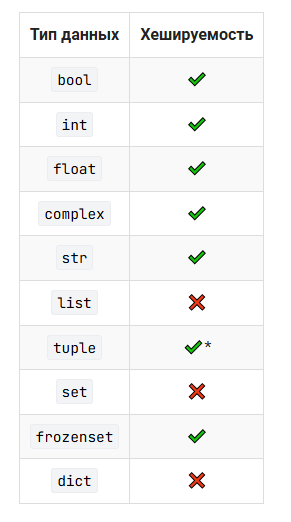

In [11]:
from functions import picture

picture('dsfhdsfjБез имени.png')

Кортежи (тип tuple) хешируемы только при условии, что их элементы являются хешируемыми.

In [12]:
tpl = (1, 2, True, 'python')

print(hash(tpl))

2494012287842468277


In [13]:
tpl = (1, 2, [True, 'python'])

print(hash(tpl))

TypeError: unhashable type: 'list'

Функция help()

Функция help() используется для получения документации по указанному модулю, функции или другому объекту. Она принимает в качестве аргумента либо сам объект, либо строку с именем объекта. Вызов без аргументов запускает интерактивную справочную систему в консоли интерпретатора (для выхода используйте quit)

In [14]:
help(print)
help('sorted')

Help on built-in function print in module builtins:

print(*args, sep=' ', end='\n', file=None, flush=False)
    Prints the values to a stream, or to sys.stdout by default.

    sep
      string inserted between values, default a space.
    end
      string appended after the last value, default a newline.
    file
      a file-like object (stream); defaults to the current sys.stdout.
    flush
      whether to forcibly flush the stream.

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.

    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.


Функция repr()

Функция repr() принимает в качестве аргумента некоторый объект и возвращает строку, содержащую формальное (понятное интерпретатору) представление переданного объекта.

In [15]:
from datetime import date

print(repr('stepik'))
print(repr([1, 2, 3, 4]))
print(repr(date(2022, 1, 16)))

'stepik'
[1, 2, 3, 4]
datetime.date(2022, 1, 16)


Примечание 2. Имейте в виду, что хеш-функция может меняться в новых версиях языка Python. Поэтому всегда является плохой идеей сохранять хеш-значения, которые генерирует встроенная функция hash()  в базу данных или на диск.

Примечание 3. В настоящий момент в Python встроенная функция hash() использует алгоритм SipHash. SipHash – это семейство псевдослучайных функций на основе add-rotate-xor (ARX). Алгоритм создан Дэниелом Дж. Бернстайном в 2012 году.

Примечание 4. Существуют общепринятые и криптостойкие алгоритмы хеширования, такие как MD5 или SHA. Для их использования в Python есть специальный модуль hashlib. 

Функция hash_as_key()
Реализуйте функцию hash_as_key(), которая принимает один аргумент:

objects — список хешируемых объектов
Функция должна возвращать словарь, ключом в котором является хеш-значение объекта из списка objects, а значением — сам объект. Если хеш-значения некоторых объектов совпадают, их следует объединить в список.

Примечание 1. Элементы в возвращаемом функцией словаре, а также объекты в списке, имеющие равные хеш-значения, должны располагаться в своем исходном порядке.

Примечание 2. В тестирующую систему сдайте программу, содержащую только необходимую функцию hash_as_key(), но не код, вызывающий ее.

In [34]:
def hash_as_key(objects: list):
    result = dict()
    for i in objects:
        result.setdefault(hash(i), []).append(i)
    for k, v in result.items():
        if len(v) == 1:
            result[k] = v[0]
    return result


data = [1, 2, 3, 4, 5, 5]

print(hash_as_key(data))

data = [-1, -2, -3, -4, -5]

print(hash_as_key(data))

{1: 1, 2: 2, 3: 3, 4: 4, 5: [5, 5]}
{-2: [-1, -2], -3: -3, -4: -4, -5: -5}


In [36]:
from collections import defaultdict


def hash_as_key(objects: list):
    result = defaultdict(list)  # Используем defaultdict для списков
    for i in objects:
        result[hash(i)].append(i)  # Добавляем элемент в список по хешу
    # Если список содержит только один элемент, заменяем его на сам элемент
    for k, v in result.items():
        if len(v) == 1:
            result[k] = v[0]
    return dict(result)


data = [1, 2, 3, 4, 5, 5]

print(hash_as_key(data))

data = [-1, -2, -3, -4, -5]

print(hash_as_key(data))

{1: 1, 2: 2, 3: 3, 4: 4, 5: [5, 5]}
{-2: [-1, -2], -3: -3, -4: -4, -5: -5}


Функция eval()

Функция eval() выполняет строку-выражение, переданную ей в качестве обязательного аргумента, и возвращает результат выполнения этой строки. Аргумент функции:

expression — строка-выражение, которую требуется исполнить
Для выполнения строки-выражения, функция eval() совершает следующие шаги:

Парсит (parse) выражение
Компилирует (compile) выражение в байт-код
Вычисляет (evaluate) значение выражения
Возвращает (return) результат вычисления

In [37]:
expression = '7 + 10'

result = eval(expression)

print(type(result))
print(result)

<class 'int'>
17


Выражения, передаваемые в качестве аргумента функции eval(), имеют доступ ко всем встроенным функциям Python.

In [45]:
expression1 = "print('Привет из функции eval()')"
expression2 = "len([1, 1, 1, 1, 1])"

result1 = eval(expression1)
result2 = eval(expression2)

print(result1)
print(result2)

Привет из функции eval()
None
5


Выражения, передаваемые в качестве аргумента функции eval(), имеют доступ ко всем локальным и глобальным переменным.

In [49]:
from math import pi

n = 10
nums = [1, 2, 3, 4, 5]

expression1 = "n + 7"
expression2 = "[i**2 for i in nums]"
expression3 = "pi / 2"

result1 = eval(expression1)
result2 = eval(expression2)
result3 = eval(expression3)

print(result1)
print(result2)
print(result3)

17
[1, 4, 9, 16, 25]
1.5707963267948966


In [1]:
expression3 = "pi / 2"

result3 = eval(expression3)

print(result3)

NameError: name 'pi' is not defined

Имейте в виду, что не все языковые конструкции являются выражениями (expression). Операторами, которые нельзя использовать в качестве выражений, являются, например, while, for, if, def, import, class, raise и т.

In [52]:
num = 17

eval('if num == 10: print(num)')

SyntaxError: invalid syntax (<string>, line 1)

Если ключевое слово for используется в списочном выражении, то функция eval() может его вычислить.

In [53]:
expression = "[x**2 for x in range(5)]"
result = eval(expression)
print(result)

[0, 1, 4, 9, 16]


In [ ]:
num = 17

eval("print(num) if num == 10 else print('AZAZA')")

Здесь, как и в случае со списочным выражением и оператором for, тернарное выражение допускает применение операторов if и else

 Несмотря на то, что eval() не поддерживает прямой импорт с использованием конструкции import, вызов __import__('math') — это допустимый вызов Python-функции, который возвращает модуль math. После этого можно использовать его атрибуты, например, pi.

In [ ]:
print(eval("__import__('math').pi / 2"))

Парсинг объектов

С помощью функции eval() можно парсить объекты, то есть преобразовывать из строки в реальные Python объекты.

In [54]:
list_data = eval("['Python', 'C#', 'Java']")
tuple_data = eval('(1, 2, 3, 4, 5)')
dict_data = eval("{1: 'January', 2: 'February'}")

print(type(list_data), len(list_data))
print(type(tuple_data), max(tuple_data))
print(type(dict_data), dict_data[2])

<class 'list'> 3
<class 'tuple'> 5
<class 'dict'> February


Функция exec()

Функция exec(), в отличие от eval(), принимает блок кода и выполняет его, возвращая значение None. Аргумент функции:

code — строка, представляющая собой корректный блок кода

In [57]:
code = '''a = 10
b = 20
print(a + b)'''

exec(code)

30


Важно понимать, что функция exec() именно выполняет переданный блок кода и всегда возвращает значение None.

In [58]:
code = '100 + 10*7 - 14'

result = exec(code)

print(result)

None


Блок кода, передаваемый в качестве аргумента функции exec(), имеет доступ ко всем встроенным функциям Python.

In [59]:
code1 = 'print(sorted([3, 5, 4, 1, 2]))'
code2 = 'print(sum([3, 5, 4, 1, 2]))'
code3 = 'print(len([3, 5, 4, 1, 2]))'

exec(code1)
exec(code2)
exec(code3)

[1, 2, 3, 4, 5]
15
5


Блок кода, передаваемый в качестве аргумента функции exec(), имеет доступ ко всем локальным и глобальным переменным.

In [60]:
numbers = [1, 2, 3, 4, 5]
info = {'name': 'Timur', 'surname': 'Guev'}

code1 = '''total = 0
for i in numbers:
    total += i
print(total)'''
code2 = 'print(info["name"], info["surname"])'

exec(code1)
exec(code2)

15
Timur Guev


Примечание 3. Использовать функции eval() и exec() нужно аккуратно, поскольку они являются небезопасными, так как выполняют произвольный код. Выполняемый код должен быть надежным и не содержать потенциальных угроз.

Коллекции
Напишите программу, которая принимает на вход корректный непустой список, корректный непустой кортеж или корректное множество произвольной длины, и выполняет следующее:

если введен список, выводит его последний элемент
если введен кортеж, выводит его первый элемент
если введено множество, выводит количество его элементов
Формат входных данных
На вход программе подается корректный непустой список, кортеж или корректное произвольной длины множество.

Формат выходных данных
Программа должна вывести определенное значение, в зависимости от типа введенной коллекции.

In [114]:
s = eval(input())
# s = eval('[[1, 2], [3, 4], [5, 6]]')
# s = eval("{'Arthur', 'Timur', 'Anri', 'Ruslan', 'Dima'}")
# s = eval("('black', 'blue', 'red', 'orange', 'green', 'gray')")

if type(s) == list:
    print(s[-1])
elif type(s) == tuple:
    print(s[0])
elif type(s) == set:
    print(len(s))

black


Математические выражения
Напишите программу, которая принимает на вход произвольное количество строк, содержащих корректные математические выражения, и выводит значение наибольшего из них.

Формат входных данных
На вход программе подается произвольное количество строк, каждое из которых содержит корректное математическое выражение.

Формат выходных данных
Программа должна вычислить значения введенных выражений и вывести наибольшее.

Примечание 1. Под корректным математическим выражением подразумевается выражение, полностью соответствующее синтаксису языка Python.

In [ ]:
from sys import stdin

print(max((eval(i) for i in stdin)))

In [ ]:
import sys

print(max(map(eval, sys.stdin)))

In [ ]:
print(max(map(eval, open(0))))

Минимум и максимум
Напишите программу, которая определяет минимальное и максимальное значения функции на отрезке в целых точках.

Формат входных данных
На вход программе в первой строке подается корректная функция f(x), в следующей строке вводятся два целых числа a и b, разделенные пробелом, которые представляют границы отрезка [a;b].

Формат выходных данных
Программа должна определить минимальное и максимальное значения функции f(x) на отрезке [a;b] в целых точках и вывести полученный результат в следующем формате:

Минимальное значение функции <функция f(x)> на отрезке <отрезок> равно <мин. значение>
Максимальное значение функции <функция f(x)> на отрезке <отрезок> равно <макс. значение>
Примечание 1. Под корректной функцией подразумевается выражение, полностью соответствующее синтаксису языка Python.

In [ ]:
f = input()
a, b = input().split()

l = [eval(f) for x in range(int(a), int(b) + 1)]
print(f"Минимальное значение функции {f} на отрезке [{a}; {b}] равно {min(l)}")
print(f"Максимальное значение функции {f} на отрезке [{a}; {b}] равно {max(l)}")